In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [17]:
# EDA

df=pd.read_csv("Mall_Customers.csv")
df.head()
X = df[['Age', 'Spending Score (1-100)']]
print(df.shape)
print(df.describe)
print(df.dtypes)


(200, 5)
<bound method NDFrame.describe of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>
CustomerID                 int64
Gender                 

In [20]:
#Data visualization

plt.style.use('fivethirtyeight')

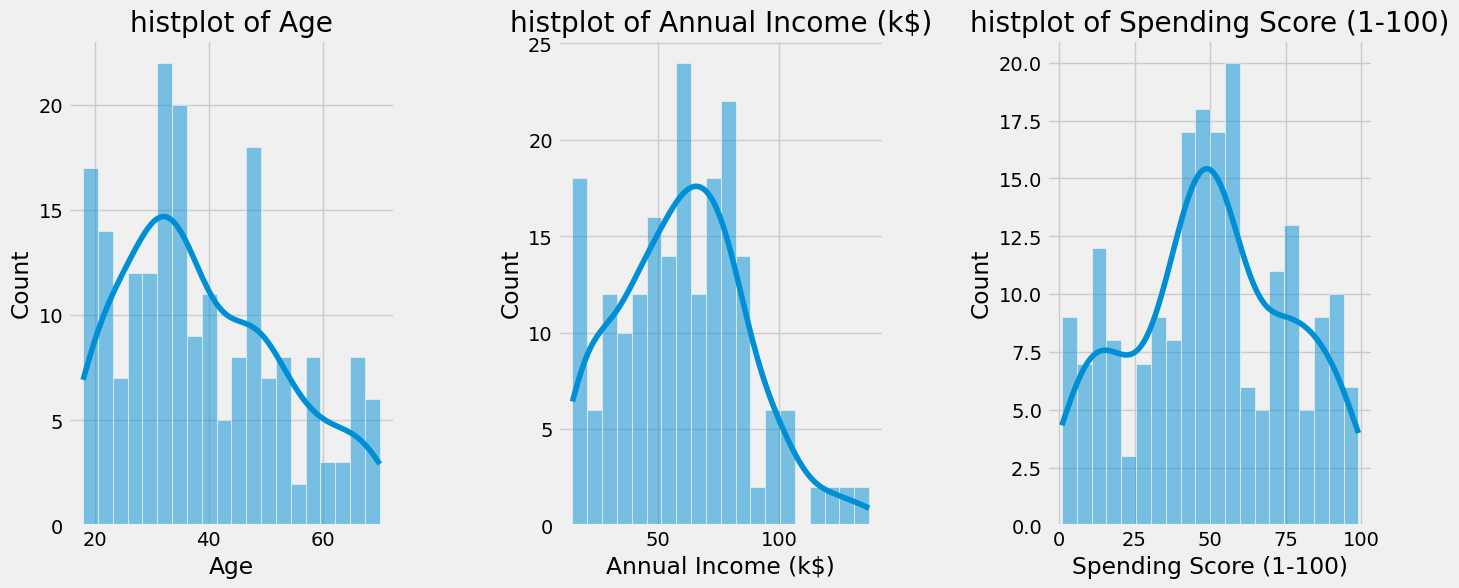

In [28]:

plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.histplot(df[x] , bins = 20,kde=True)
    plt.title('histplot of {}'.format(x))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

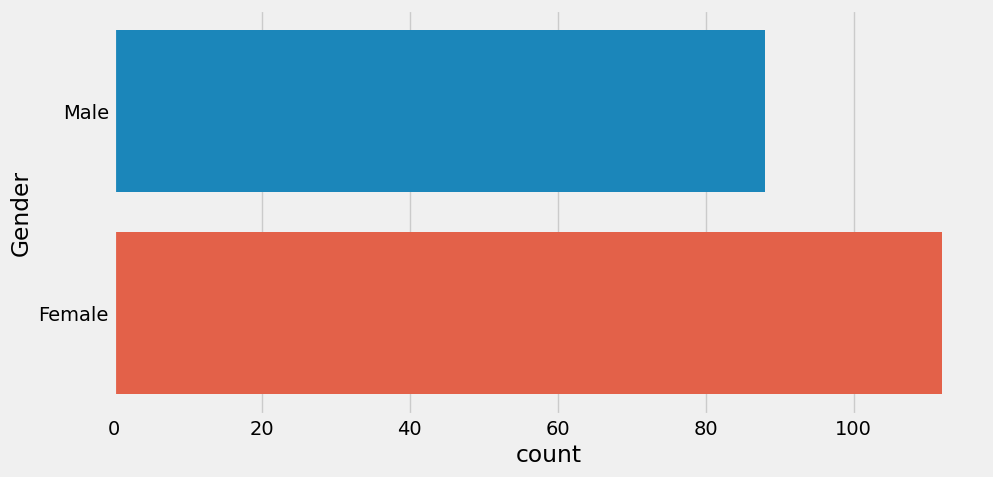

In [29]:
plt.figure(1,figsize=(10,5))
sns.countplot(y='Gender',data=df)
plt.show

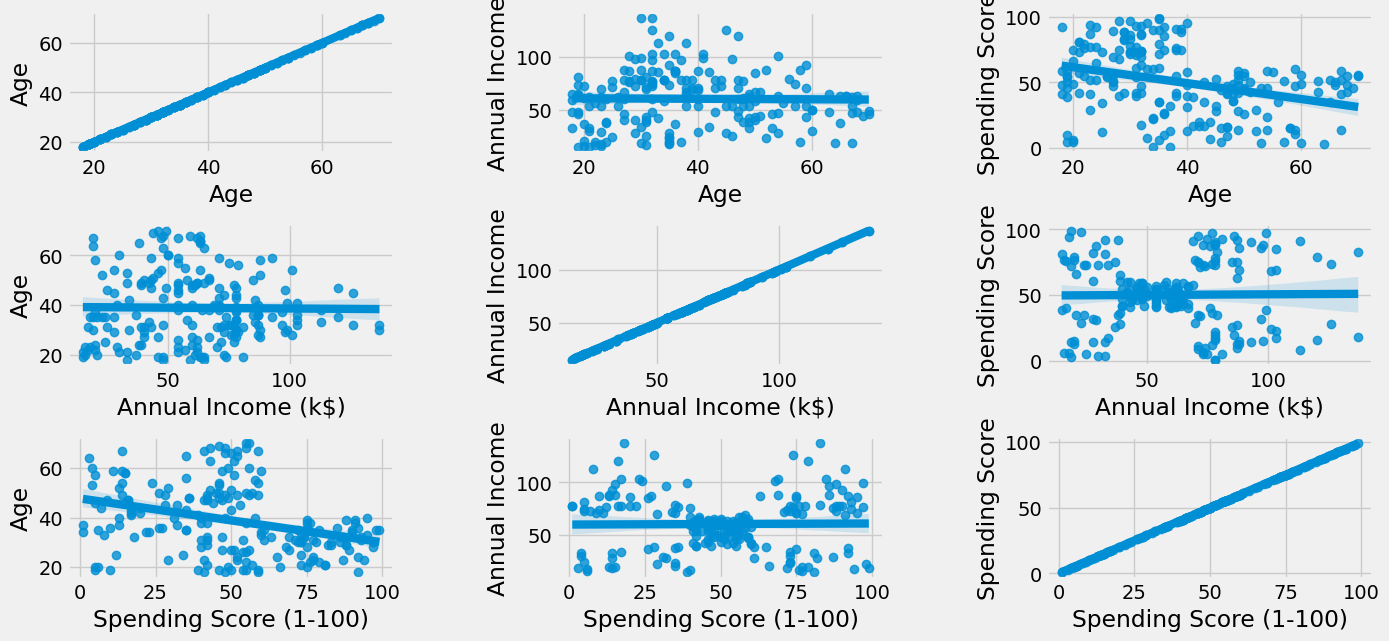

In [30]:
#Relation between Age , Annual Income and Spending Score

plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n=n+1
        plt.subplot(3,3,n)
        plt.subplots_adjust(hspace=0.5,wspace=0.5)
        sns.regplot(x=x,y=y,data=df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

In [31]:
#Clustering using K- means

from sklearn.cluster import KMeans

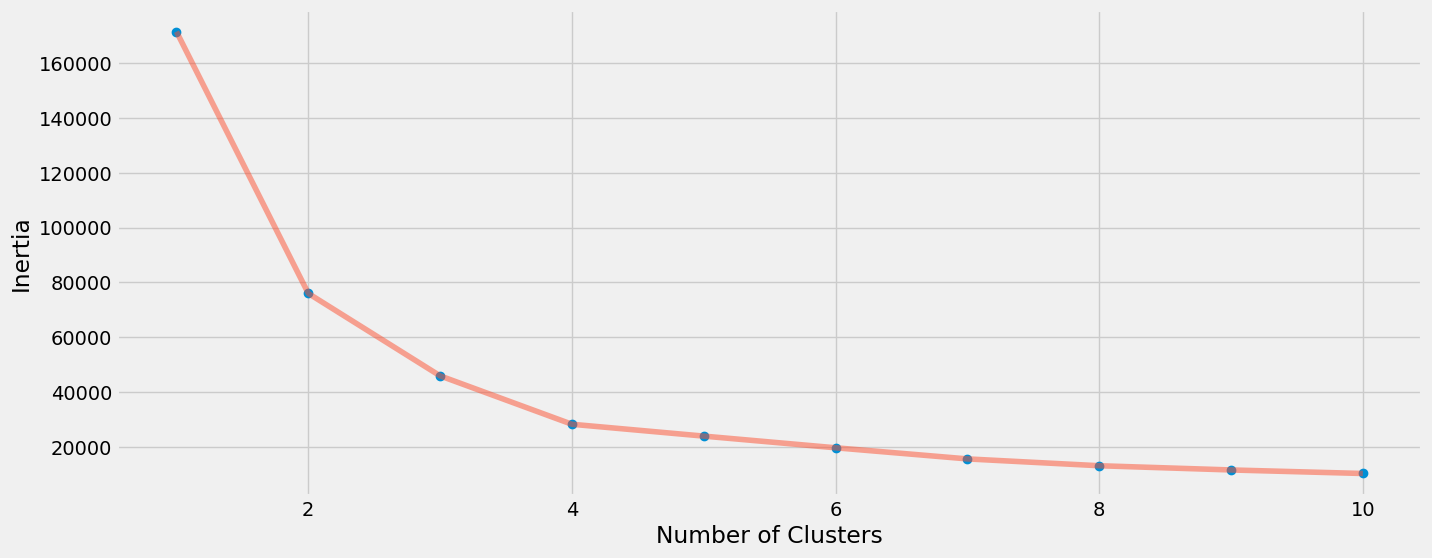

In [37]:
#age & spending score
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia=[]
for n in range (1,11):
    K_means=(KMeans(n_clusters=n,init='k-means++',n_init=10,max_iter=200, tol=0.0001,random_state=111,algorithm='lloyd'))
    K_means.fit(X1)
    inertia.append(K_means.inertia_)
#Selecting N Clusters based in Inertia


plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min,y_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1